In [8]:
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA

In [2]:
with open('grandmasterData.json') as f:
  gdData = f.read()
gdDict = json.loads(gdData)

In [3]:
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
  for i in range(len(gdDict[summonerID])):
    for puuid, dataDict in gdDict[summonerID][i].items():
      placements.append(dataDict["placement"])
      traits.append(dataDict["traits"])
      augments.append(dataDict["augments"])
      units.append(dataDict["units"])
    # break
  # break
df = pd.DataFrame()
df["placement"] = placements
df["traits"] = traits
df["augments"] = augments
df["units"] = units

df.head()

,placement,traits,augments,units
0,4,"[Set10_Brawler, Set10_Classical, Set10_Country...","[TFT9_Augment_DravenSpoilsOfWar, TFT9_Augment_...","[TFT10_Bard, TFT10_Aphelios, TFT10_MissFortune..."
1,8,"[Set10_Brawler, Set10_Breakout, Set10_Dazzler,...","[TFT7_Augment_AFK, TFT10_Augment_Determinedinv...","[TFT10_KSante, TFT10_Senna, TFT10_Lulu, TFT10_..."
2,3,"[Set10_8Bit, Set10_Brawler, Set10_CrowdDive, S...","[TFT9_Augment_OneTwosThree, TFT9_Augment_Great...","[TFT10_MissFortune, TFT10_Sett, TFT10_Zac, TFT..."
3,6,"[Set10_CrowdDive, Set10_Edgelord, Set10_Execut...","[TFT9_Augment_CustomerIsAlwaysRight, TFT9_Augm...","[TFT10_Lillia, TFT10_Gnar, TFT10_Kayle, TFT10_..."
4,7,"[Set10_Deadeye, Set10_Guardian, Set10_Hyperpop...","[TFT9_Augment_SilverSpoon, TFT9_Augment_Pandor...","[TFT10_Lillia, TFT10_Kennen, TFT10_Seraphine, ..."


In [4]:
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('traits')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("trait_"))

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('units')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("unit_"))

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('augments')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("augment_"))
df.head()

,placement,trait_Astro,trait_Battlecast,trait_Blaster,trait_Chrono,trait_Cybernetic,trait_DarkStar,trait_Demolitionist,trait_Infiltrator,trait_ManaReaver,...,augment_TFT9_Augment_TiniestTitan,augment_TFT9_Augment_TiniestTitanPlus,augment_TFT9_Augment_TonsOfStats,augment_TFT9_Augment_TwoHealthy,augment_TFT9_Augment_UnleashedArcana,augment_TFT9_Augment_WhatDoesntKillYou,augment_TFT9_Augment_WhatTheForge,augment_TFT9_Augment_YouHaveMyBow,augment_TFT9_Augment_YouHaveMySword,augment_TFT9_Augment_YoungAndWildAndFree
0,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def reduceFeatures(df, target, n_components):
    features = list(df.columns)
    features.remove(target)

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df[features])

    PCs = []
    colNames = []
    for i in range(n_components):
        PCs.append(components[:,i])
        colNames.append(f"PC{i+1}")

    zipped = list(zip(*PCs,
                      df[target]))

    pc_df = pd.DataFrame(zipped,
                         columns=[*colNames,
                                      target])

    return pc_df

In [6]:
# n_components necessary to explain 80% of the variance
pc_df = reduceFeatures(df, "placement", 60)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,placement
0,2.472877,-0.516134,-0.423691,1.090205,1.647069,0.461296,0.476851,0.901291,0.322702,-0.074295,...,-0.138866,-0.080891,-0.062343,-0.129455,0.038423,-0.071322,0.019740,-0.037256,0.030140,4
1,-0.617901,-1.594665,0.718298,0.053678,-0.698367,-0.376901,0.376404,-0.765912,1.074948,0.675144,...,0.281274,0.291889,0.095189,-0.011354,-0.169972,0.250010,-0.045914,0.116811,0.053977,8
2,2.198565,-0.209806,-0.137471,-1.152329,-0.889904,0.451186,-0.200000,-0.263527,-0.187502,0.905201,...,0.044436,0.119435,-0.130166,-0.159865,-0.091803,-0.079166,-0.065031,0.104428,0.001433,3
3,-1.219602,2.168358,-0.343408,-0.250048,0.082408,-1.092122,-0.005966,0.251824,0.044844,-0.370517,...,0.149442,-0.166573,-0.129823,-0.138344,-0.028074,-0.200522,-0.167761,0.082353,0.136221,6
4,-2.155069,-1.364458,0.006958,-0.529022,0.315303,0.163543,-1.048458,0.568980,-0.675846,-0.149907,...,-0.126724,-0.117838,-0.266446,0.363976,-0.227637,0.109958,0.104989,-0.064823,-0.038540,7


In [9]:
X_train, X_test, y_train, y_test = train_test_split(pc_df, df["placement"], test_size=0.25)

In [66]:
def plotClusters(X_labels, X_data, n):

    full_df = X_data.copy()
    full_df.insert(0, "Cluster_Labels", X_labels)
    full_df = full_df.loc[:,:f"PC{n}"]

    cPal = sns.color_palette("bright", n_colors=n)

    g = sns.PairGrid(data=full_df,
                    hue="Cluster_Labels")
    g.map(sns.scatterplot, linewidth=0, s=1, palette=cPal)

    plt.suptitle(f"TFT PCA KMeans Clustering with {n} Clusters",
              fontsize=16)
    g.fig.subplots_adjust(top=0.9)
    g.add_legend()

    plt.show()

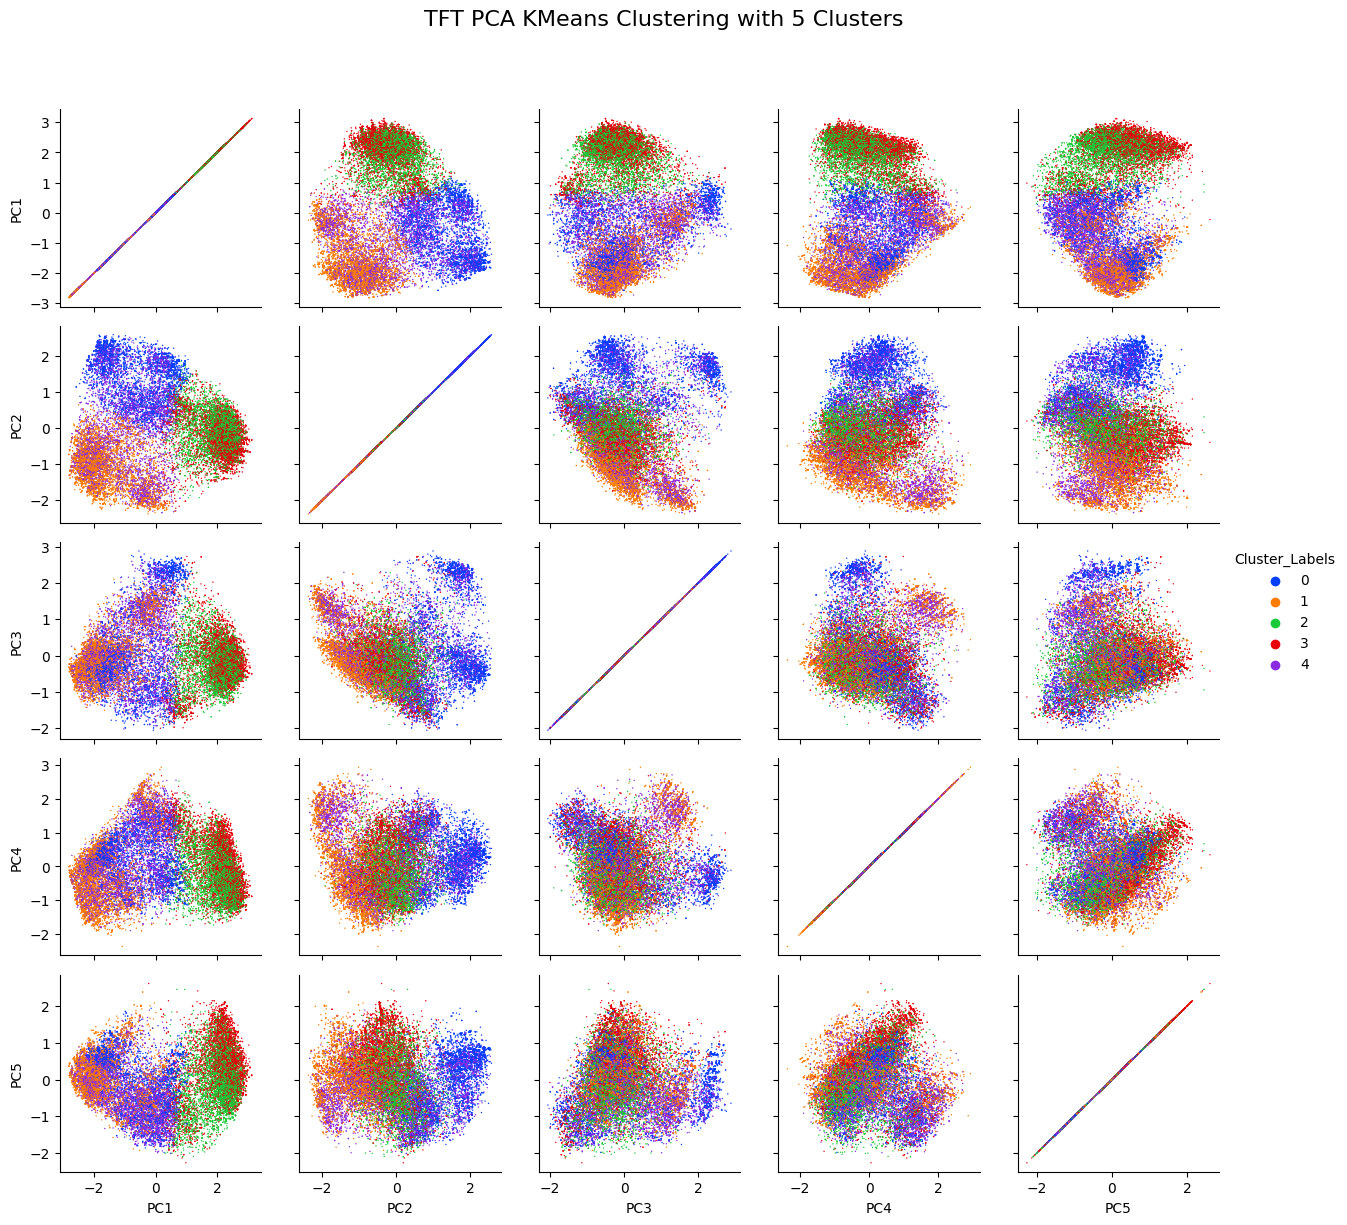

In [67]:
clusters = 5
kmeansClustering = KMeans(n_clusters=clusters).fit(X_train)
plotClusters(kmeansClustering.labels_, X_train, clusters)